- Name- Sahil Rao 
- Email- invsahilrao@gmail.com

# NSE STOCK HISTORICAL DATASET EXPLORATORY DATA ANALYSIS 

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df=pd.read_csv("nse_all_stock_data (1).csv",parse_dates=['Date'])

## data preprocessing 

In [3]:
df.head()

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,...,COOLCAPS,ALLETEC,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
0,1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(8470, 1418)

In [5]:
df.isnull().sum()

Date             0
RELIANCE      1310
TCS           3034
HDFCBANK      1307
ICICIBANK     3005
              ... 
DONEAR        4147
CAREERP       5081
INTLCONV      7778
SHREEPUSHK    6297
PRITIKAUTO    7753
Length: 1418, dtype: int64

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

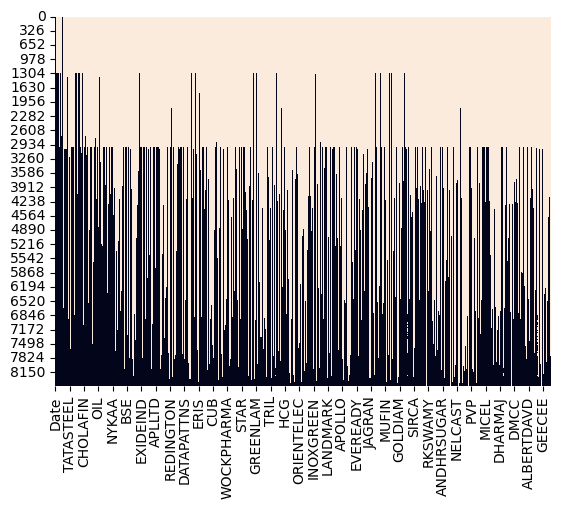

In [7]:
sns.heatmap(df.isnull(),cbar=False)


- 50% of the columns have more than 50% of the data missing  
- almost for all the data below 2900 are missing
- so that means for most of the company that period of time is missing 
 dropping the rows for that time frame

In [8]:
df.drop(df.index[0:2901],inplace=True)
df.shape

(5569, 1418)

In [9]:
rows=df.shape[0]
missing_datas=df.isnull().sum()/rows*100
missing_datas

Date           0.000000
RELIANCE       0.125696
TCS            2.388221
HDFCBANK       0.071826
ICICIBANK      1.867481
                ...    
DONEAR        22.373855
CAREERP       39.145268
INTLCONV      87.574071
SHREEPUSHK    60.980427
PRITIKAUTO    87.125157
Length: 1418, dtype: float64

- dropping the columns that have more than or equal to 80 % of data missing 

In [10]:

columns_to_drop=missing_datas[missing_datas>=80].index
columns_to_drop

Index(['LICI', 'JIOFIN', 'IRFC', 'ZOMATO', 'ADANIENSOL', 'LODHA', 'MANKIND',
       'MAXHEALTH', 'SBICARD', 'JSWINFRA',
       ...
       'VLEGOV', 'RACE', 'RITCO', 'PYRAMID', 'ACCENTMIC', 'INDOBORAX',
       'COOLCAPS', 'ALLETEC', 'INTLCONV', 'PRITIKAUTO'],
      dtype='object', length=343)

In [11]:
new_df=df.drop(columns=columns_to_drop)

In [12]:
new_df.shape

(5569, 1075)

<AxesSubplot:>

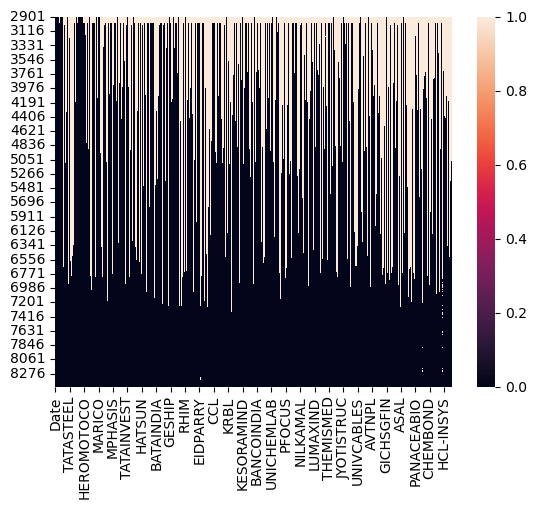

In [13]:
sns.heatmap(new_df.isnull())

### filling the data 

- sorting the data by date and then filling with ffilll and then bfill

In [14]:

new_df.sort_values('Date',inplace=True)
new_df.set_index('Date',inplace=True)

In [15]:
rows=new_df.shape[0]
missing_values=new_df.isnull().sum()/rows*100
missing_values

RELIANCE       0.125696
TCS            2.388221
HDFCBANK       0.071826
ICICIBANK      1.867481
BHARTIARTL     1.867481
                ...    
VIKASECO      44.370623
ORIENTBELL    23.020291
DONEAR        22.373855
CAREERP       39.145268
SHREEPUSHK    60.980427
Length: 1074, dtype: float64

### showing the graph before filling the missing data 

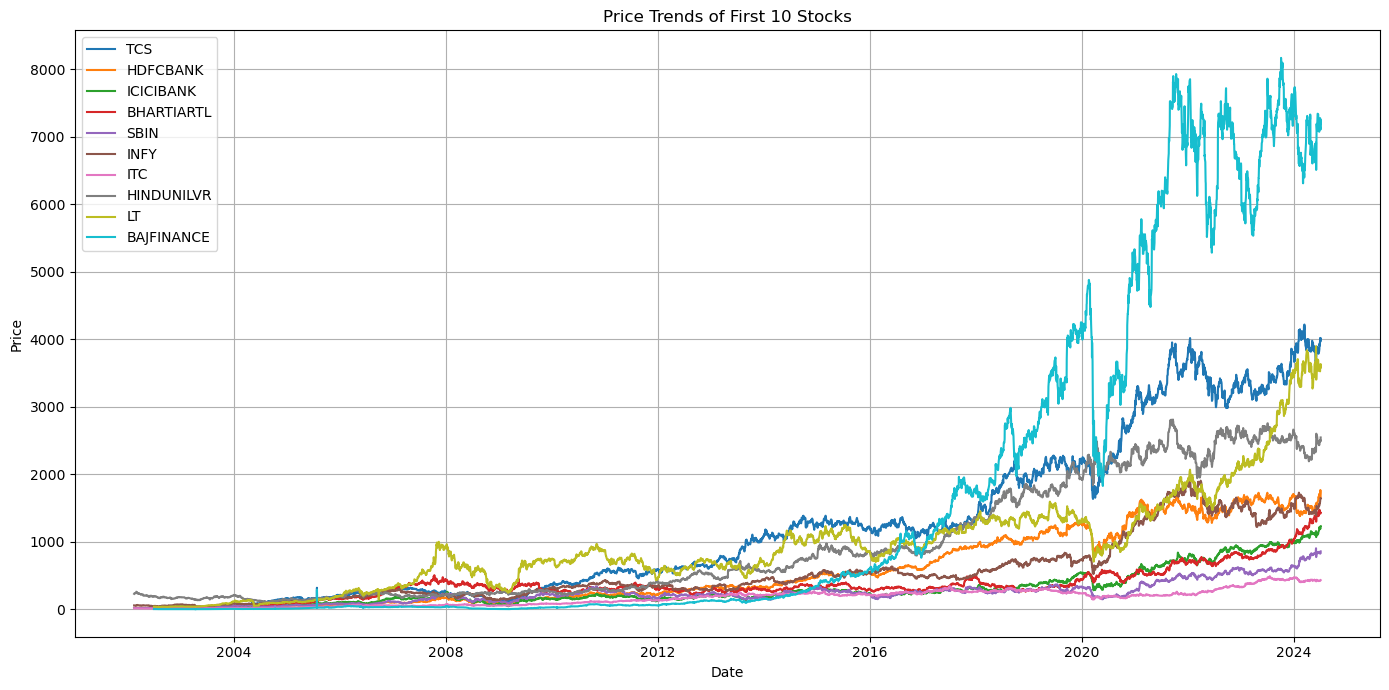

In [17]:
stocks = new_df.iloc[:, 1:11] 

plt.figure(figsize=(14, 7))  # Adjust figure size as needed

for column in stocks.columns:
    plt.plot(new_df.index, stocks[column], label=column)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trends of First 10 Stocks')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [18]:
new_df.ffill(inplace=True)
new_df.bfill(inplace=True)

- removing the duplicates if any 

In [19]:
 
new_df.drop_duplicates(inplace=True)

### showing after filling the missing data 

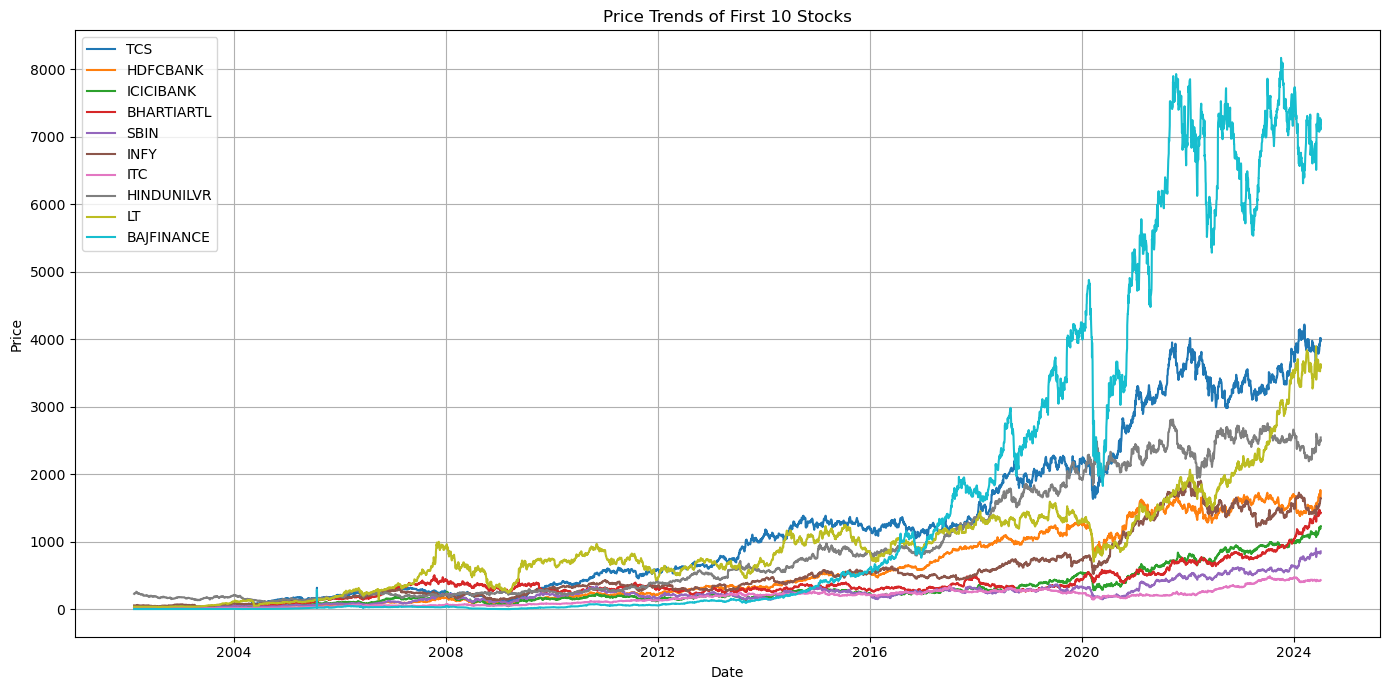

In [21]:
stocks = new_df.iloc[:, 1:11] 

# Plotting
plt.figure(figsize=(14, 7))  # Adjust figure size as needed

# Plot each stock
for column in stocks.columns:
    plt.plot(new_df.index, stocks[column], label=column)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trends of First 10 Stocks')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

### Observations 
-  Most of the stocks show a general upward trend over the period, indicating growth in their prices over time.
-  TCS shows significant growth especially after 2016, indicating significant growth.HDFC Bank and ICICI Bank show impressive growth, growing rapidly from 2020 onwards.




#### note 
no significant difference in both the graphs , so correct method is used in filling the null values 

### basic statistical analysis 

In [22]:
new_df.describe()

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,LT,...,PTL,MOLDTECH,MAZDA,MINDTECK,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,SHREEPUSHK
count,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,...,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000
mean,771.549223,1195.549498,560.437790,292.237490,354.268864,236.843896,542.125356,168.395756,924.165882,914.702218,...,19.953279,73.602307,428.772145,93.978166,37.749593,3.546841,149.602186,86.394436,352.111853,105.422584
std,772.668810,1171.172630,540.843877,265.541463,243.386441,162.693110,474.306839,116.793307,859.247213,737.851239,...,13.689941,53.969383,204.768784,39.051757,32.131451,2.351297,146.167387,79.400552,253.975258,62.927187
min,31.390118,35.474998,18.799999,20.100000,9.350544,20.597059,40.812500,12.896666,106.150002,34.955555,...,3.275000,29.850000,233.699997,12.750000,7.100000,0.624703,14.000000,8.900000,51.150002,59.349998
25%,315.964806,225.174999,104.447498,125.997730,261.443474,117.357483,204.257809,59.566666,228.537502,361.213890,...,10.030000,60.849998,359.149994,94.650002,16.775000,2.502025,65.487499,25.250000,123.387501,63.049999
50%,452.743271,726.712524,321.387497,201.000000,316.994720,219.922501,377.109375,187.333328,543.024994,764.788879,...,15.525000,60.849998,359.149994,94.650002,30.200001,2.502025,70.000000,46.725000,201.849998,63.049999
75%,1032.190247,1921.425049,1020.106262,338.149994,388.796745,288.450012,669.162521,245.333336,1698.425018,1246.587494,...,23.674999,60.849998,359.149994,94.650002,40.000000,3.750000,170.050003,190.499996,660.000000,150.075001
max,3177.250000,4219.250000,1768.650024,1233.400024,1475.800049,905.650024,1939.500000,492.149994,2812.449951,3897.149902,...,84.900002,388.950012,1556.550049,340.299988,227.800003,17.518017,806.200012,236.149994,660.000000,332.000000


In [23]:
daily_returns=new_df.iloc[:,1:].pct_change().dropna()
volatility=daily_returns.std()
daily_returns[:5]

,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,LT,BAJFINANCE,...,PTL,MOLDTECH,MAZDA,MINDTECK,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,SHREEPUSHK
Date,,,,,,,,,,,,,,,,,,,,,
2002-02-15,0.0,0.022772,0.0,0.0,-0.012910,0.000678,0.023610,0.015365,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-02-18,0.0,0.063798,0.0,0.0,-0.021328,-0.027993,0.028160,0.035379,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-02-19,0.0,-0.053331,0.0,0.0,-0.014391,-0.005926,0.003817,-0.008234,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-02-20,0.0,0.004677,0.0,0.0,0.002920,-0.015524,-0.028486,-0.003321,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-02-21,0.0,0.001481,0.0,0.0,0.015807,0.002329,0.012978,0.002707,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
volatility[:5] #assesing the risk here 

TCS           0.036227
HDFCBANK      0.018508
ICICIBANK     0.024070
BHARTIARTL    0.022853
SBIN          0.022570
dtype: float64

- calculated the daily returns of the stocks means changes of prices of stocks on dates basis 
- also calculated volatility of the stocks for identifying the low risk and high risks stocks 

#### highest risk stock 

In [25]:
temp=volatility[:].max()
volatility[volatility.values==temp]


GFLLIMITED    1.34166
dtype: float64

## correlation analysis

In [26]:
correlation_matrix=daily_returns.corr()
correlation_matrix

,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,ITC,HINDUNILVR,LT,BAJFINANCE,...,PTL,MOLDTECH,MAZDA,MINDTECK,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,SHREEPUSHK
TCS,1.000000,0.167237,0.198516,0.165222,0.147453,0.288794,0.140965,0.138037,0.120689,0.398117,...,0.027604,0.021515,0.034829,0.024492,0.045469,0.013180,0.039551,0.058024,0.025935,0.022958
HDFCBANK,0.167237,1.000000,0.563095,0.318592,0.482425,0.303257,0.341619,0.282235,0.374179,0.057523,...,0.114211,0.059848,0.094396,0.053812,0.134137,0.048449,0.143007,0.148341,0.110220,0.098565
ICICIBANK,0.198516,0.563095,1.000000,0.357841,0.622604,0.311275,0.324730,0.261148,0.428508,0.116928,...,0.139171,0.052654,0.102774,0.062082,0.177560,0.075739,0.155300,0.171810,0.144284,0.119839
BHARTIARTL,0.165222,0.318592,0.357841,1.000000,0.331805,0.241052,0.246336,0.209131,0.258909,0.101090,...,0.063890,0.036475,0.062368,0.029484,0.114597,0.038147,0.088845,0.093957,0.074655,0.066828
SBIN,0.147453,0.482425,0.622604,0.331805,1.000000,0.257133,0.334030,0.245478,0.414107,0.059651,...,0.149114,0.085603,0.125805,0.088449,0.194333,0.086630,0.174576,0.200397,0.172295,0.155470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIKASECO,0.013180,0.048449,0.075739,0.038147,0.086630,0.031985,0.078288,0.030828,0.076232,0.014659,...,0.066729,0.094231,0.093763,0.107473,0.106849,1.000000,0.088532,0.120305,0.095644,0.132834
ORIENTBELL,0.039551,0.143007,0.155300,0.088845,0.174576,0.065212,0.112460,0.083745,0.129391,0.027230,...,0.138599,0.090764,0.111390,0.118914,0.166655,0.088532,1.000000,0.135966,0.187266,0.162819
DONEAR,0.058024,0.148341,0.171810,0.093957,0.200397,0.082283,0.124260,0.087385,0.148123,0.031875,...,0.139377,0.097468,0.107973,0.122201,0.177263,0.120305,0.135966,1.000000,0.117523,0.157890
CAREERP,0.025935,0.110220,0.144284,0.074655,0.172295,0.063587,0.104926,0.067272,0.121857,0.025339,...,0.126190,0.096994,0.154094,0.115510,0.145896,0.095644,0.187266,0.117523,1.000000,0.143534


In [27]:
first_10_returns=stocks.pct_change().dropna()

In [28]:
matrix_first_10_returns=first_10_returns.corr()

<AxesSubplot:>

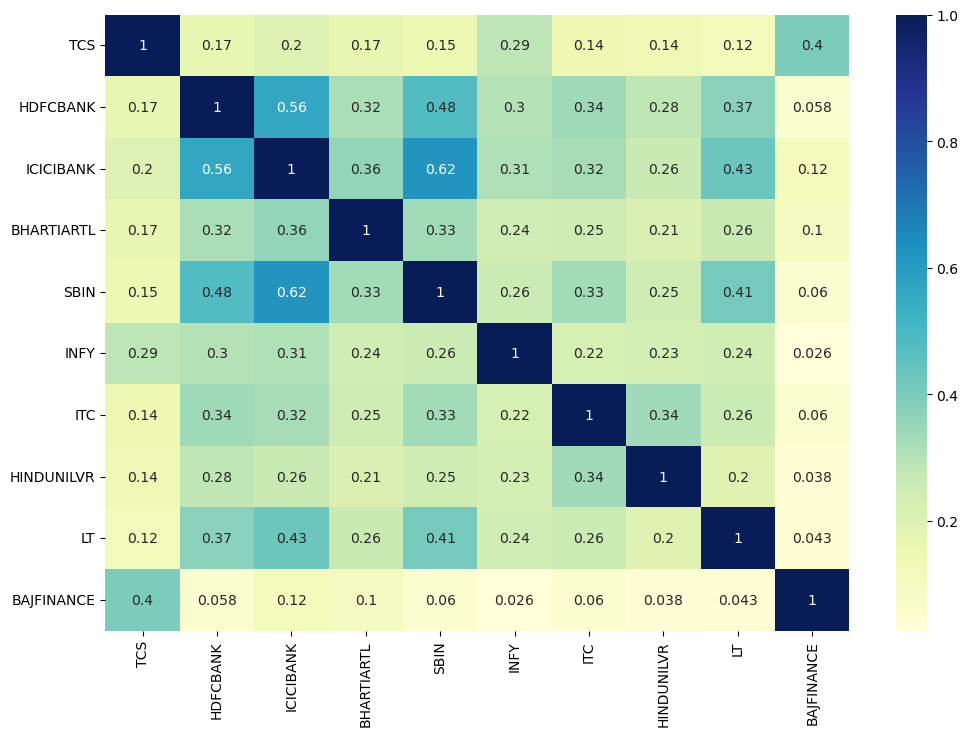

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(matrix_first_10_returns,annot=True,cmap='YlGnBu')

### identifying the most correlated pairs of stock

In [31]:
pairs_corr=correlation_matrix.unstack().sort_values(ascending=False)
pairs_corr=pairs_corr[pairs_corr!=1] #removing self correlation 

In [32]:
temp=pairs_corr[:20]
pairs_corr.drop_duplicates(inplace=True) #dropping the duplicates or the upper half of the corr matrix 

### top most is corr pairs 

In [33]:
print(pairs_corr[:10])

TRENT       BEL           0.983471

BEL         VTL           0.982851

            CESC          0.981973

BAJFINANCE  BEL           0.980643

BEL         EICHERMOT     0.977349

HINDPETRO   BPCL          0.974953

VTL         TRENT         0.974920

CESC        TRENT         0.974823

TRENT       BAJFINANCE    0.974724

CESC        VTL           0.974229

dtype: float64


In [ ]:
list(pairs_corr[:10].items())

In [34]:
# Convert data to DataFrame
ndf = pd.DataFrame(list(pairs_corr[:10].items()), columns=['Pair', 'Correlation'])


In [36]:
ndf[['Stock1', 'Stock2']] = pd.DataFrame(ndf['Pair'].tolist(), index=ndf.index)

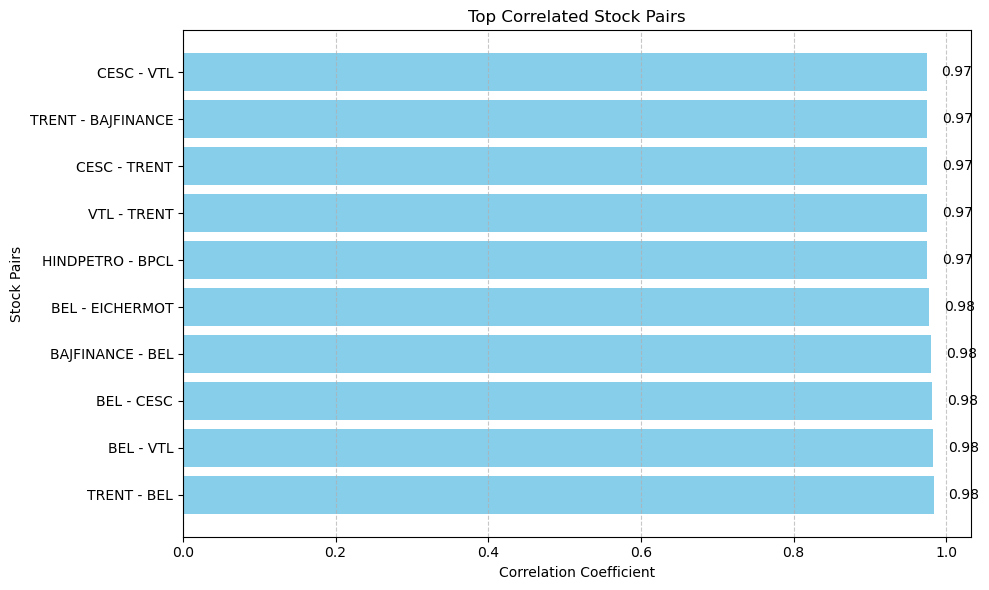

In [41]:

# Sort by correlation coefficient 
ndf_sorted = ndf.sort_values(by='Correlation', ascending=False)


plt.figure(figsize=(10, 6))
bars = plt.barh(ndf_sorted['Pair'].apply(lambda x: f'{x[0]} - {x[1]}'), ndf_sorted['Correlation'], color=ndf_sorted['Correlation'].apply(lambda x: 'skyblue' if x >= 0 else 'lightcoral'))
for bar, corr in zip(bars, ndf_sorted['Correlation']):
    plt.text(bar.get_width() * 1.02, bar.get_y() + bar.get_height()/2, f'{corr:.2f}', va='center')

plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)  
plt.xlabel('Correlation Coefficient')
plt.ylabel('Stock Pairs')
plt.title('Top Correlated Stock Pairs')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## time series decomposition 

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
reliance_data=new_df[['RELIANCE']]
decomposition=seasonal_decompose(reliance_data,model='additive',period=365)# Plot decomposition

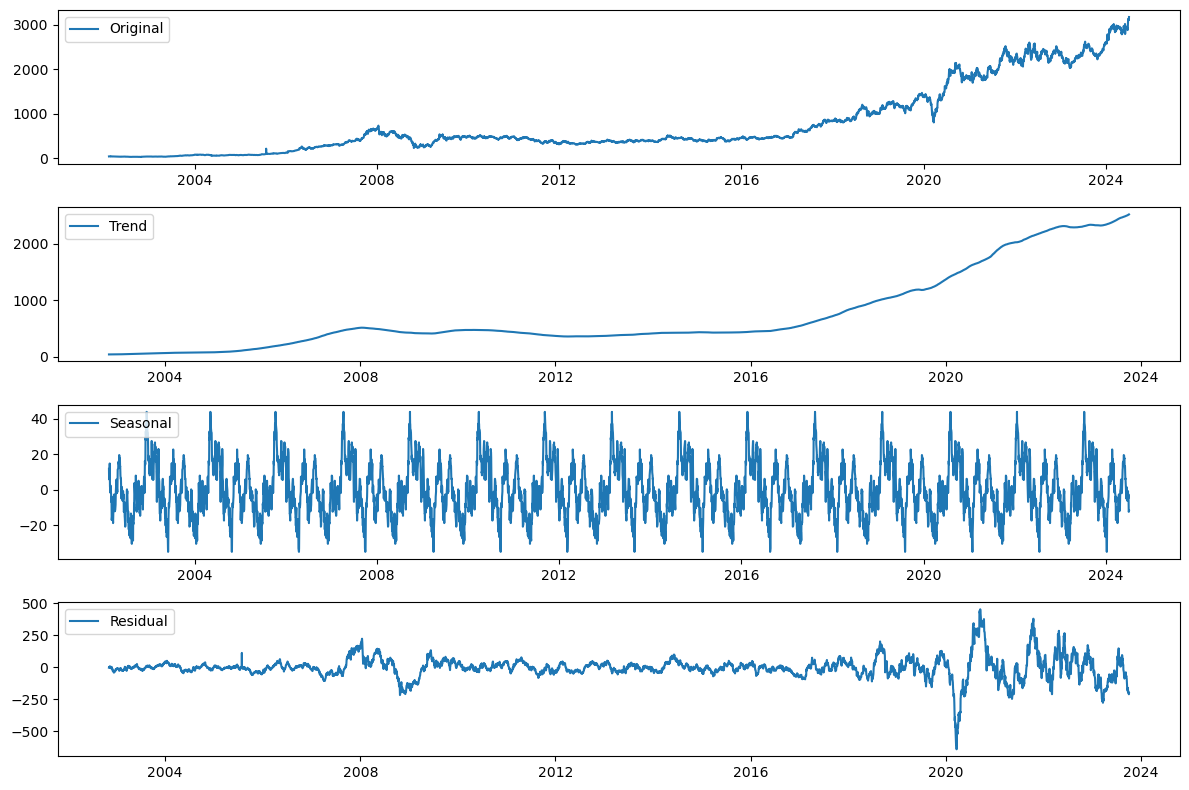

In [44]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(reliance_data, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- Trend: The trend component is used to filter out long term trends from time series. A trend chart will reveal a consistent upward movement with faster growth recorded after 2010 through to 2024.

- Seasonal: Time series seasonal components shows recurring patterns. The seasonal plot presents regular fluctuations suggesting that data has a consistent seasonality pattern that repeats every year.

- Residual: After removing the trend and seasonal components, the residual component captures random fluctuations. Residuals appear to be centered about zero with some scatter. There is an increase in residual variance around 2020, which may indicate some unusual or unexpected events affecting the data around that time.

### conclusion 

- Overall, the time series shows a strong upward trend with regular seasonal variation and some irregularities captured in the residuals.

## anomaly detection 

In [45]:
from adtk.detector import QuantileAD
from adtk.visualization import plot 
from adtk.data import validate_series

[<AxesSubplot:>]

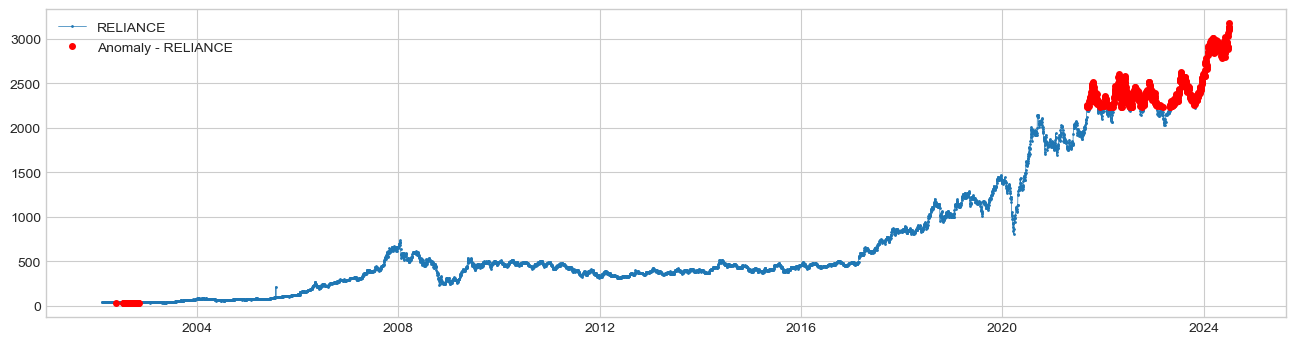

In [46]:
high_quantile=0.9 #means 99 percentile above is anaomily
low_quantile=0.01 
detector=QuantileAD(high=high_quantile,low=low_quantile)

anomaliies=detector.fit_detect(reliance_data)

plot(reliance_data,anomaly=anomaliies,anomaly_color="red",anomaly_tag="marker")